# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [ ]:
import numpy as np
import tensorflow as tf



In [ ]:
print(tf.__version__)
# 음 2.3 버전을 사용하는구만

2.3.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [ ]:
a = tf.constant(2)  # constant으로 2에 대한 상수를 만듬
print(tf.rank(a))   # 차원이 0차원
print(a)    # a값은 2
            # 기본적으로 shape,dtype은 계속 나옴

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
b = tf.constant([2,3])# numpy의 개념으로 가져가면 된다
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [ ]:
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [ ]:
d = tf.constant(['Hello'])
print(tf.rank(d))   #[]가 하나 들어가있으니까 일단 rank 1 로 보는구만
print(d)    # 일단 차이점음 dtype을 string으로 보네

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [ ]:
rand = tf.random.uniform([1],0,1) # 0~1사이로 shape을 [1]로 가지는 변수
print(rand.shape)                   # nuiform 
print(rand)

(1,)
tf.Tensor([0.13885176], shape=(1,), dtype=float32)


In [ ]:
rand2 = tf.random.normal([1,2],0,1) #normarl => 평균값이 0이고, std가 1
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-0.03388703  1.3328724 ]], shape=(1, 2), dtype=float32)


In [ ]:
rand3 = tf.random.normal(shape=(3,2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 0.47490916 -1.361794  ]
 [-0.49343437  1.3303792 ]
 [-0.6081854   0.47788823]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [ ]:
a = tf.constant(3)
b = tf.constant(2)


In [ ]:
print(tf.add(a,b))
print(a+b)

#numpy랑 비슷하게 동작함

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
print(tf.multiply(a,b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [ ]:
c = tf.add(a,b).numpy()
print(type(c))

# numpy로 붙여주니까 tf-> numpy로 바뀌네

<class 'numpy.int32'>


In [ ]:
c_square = np.square(c, dtype = np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))# 즉시 싫애모드 eager mode


tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [ ]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]])

print(t.shape)
print(t.dtype) # 실수값 가지게 뒤에 . 붙였으니까

(2, 3)
<dtype: 'float32'>


In [ ]:
print(t[:, 1:]) #슬라이싱도 가능

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [ ]:
t[...,1,tf.newaxis] # 1인덱스값만 가져온거

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
t + 10 # 브로드케스팅같은 건가

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [ ]:
tf.square(t) #제곱형태로 되는거지

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [ ]:
t @ tf.transpose(t)
# 2,3 * 3,2 = 2,2


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [ ]:
a = tf.constant(2)  #int
print(a)

b = tf.constant(2.) #float
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
# tf.constant(2.) +tf.constant(40)

# dtype을 맞춰줘야함 tf에선 , numpy랑 다름

In [ ]:
# tf.constant(2.) + tf.constant(30., dtype = tf.float64)
# 마찬가지로 float32, 64든 같이 맞춰줘야함

In [ ]:
t = tf.constant(30., dtype = tf.float64)
t2 = tf.constant(4.)


# print(t2 + t) # default가 float32 이니까 둘다 32든 64든 둘중 하나로 맞춰줘야함
print(t2  + tf.cast(t, tf.float32))     # 이거는 cast()를 이용해서 float32로 바꿔준거지


tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [ ]:
#유연성을 가질수 있대
# 모바일에서도 가질수있꼬, 임베디드에도,백엔드 서버 등등..
import timeit


### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [ ]:
@tf.function    # tf로 cell 배경 변환

def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))                   #input을 2로하든 tf.constant2로하든
print(my_function(tf.constant(2)))


tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
# 이번엔 @tf.function 안붙이고 한거야

def my_function_(x):
    return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_func = tf.function(my_function_)  # tf.function()으로 씌우면 tf화 된다


print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [ ]:
tf_my_func.python_function(2)   # tf화된걸 다시 python이전형태로 되돌리고 싶을때
                                # .python_function(x)하면된다
                                

-13

In [ ]:
def function_to_get_faster(x,y,b):
    x = tf.matmul(x,y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)  #tf로 바꾸고

x1 = tf.constant([[1.0,2.0]])
y1 = tf.constant([[2.0],[3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1,y1,b1).numpy()  # 다시 numpy로 바꾸고



array([[12.]], dtype=float32)

In [ ]:
def inner_function(x,y,b):
    x = tf.matmul(x,y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.0],[3.0]])
    b = tf.constant(4.0)
    return inner_function(x,y,b)

outer_function(tf.constant([[1.0,2.0]])).numpy() # 결국 마지막에 .numpy를 붙였으니까 python함수로 나오겟네


array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [ ]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

# 코드로 변환된 형태로 볼수 있다.

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [ ]:
class SequentialModel(tf.keras.Model):
    def __init__(self,**kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
        self.dense_1 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)

    def call(self,x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x

input_data = tf.random.uniform([60,28,28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print('Eager time : ', timeit.timeit(lambda : eager_model(input_data), number = 10000))
print('graph time : ', timeit.timeit(lambda : graph_model(input_data), number=10000))

# 확실히 tf를 씌운게 더 빠르네

Eager time :  5.166355285999998
graph time :  3.515272204999974


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [ ]:
X = tf.Variable(20.0)

print(X)
# constant가 아니라 variable로 나오지

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

    

In [ ]:
dy_dx = tape.gradient(y, x) #tape에 gradient를 호출한거지
dy_dx.numpy()

6.0

In [ ]:
x2 = tf.Variable(4)
dy_dx = tape.gradient(y,x2)
dy_dx.numpy()
# 한번만 호출을 할수있게 했으니까
# 일부로 잘 막아놓은거래

RuntimeError: ignored

In [ ]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 +tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y' : y})

print('dz/dx:' , grad['x'])
print('dz/dy:' , grad['y'])

In [ ]:
# 지속 가능하게 만들고 싶을때
weights = tf.Variable(tf.random.normal((3,2), name = 'weights'))
biases = tf.Variable(tf.zeros(2, dtype = tf.float32), name = 'biases')

x = [[1.,2.,3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [ ]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])


In [ ]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
weights2 = tf.Variable(tf.random.normal((3,2)),name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype = tf.float32), name = 'biases')
x2 = [[4.,5.,6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [ ]:
# 사용하지 않을때
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [ ]:
def sigmoid(x):
    return (1 / (1+ np.exp(-x)))

def Neuron(x ,W, bias = 0):
    z = x*W+bias
    return sigmoid(z)

In [ ]:
x = tf.random.normal((1,2),0,1)
W = tf.random.normal((1,2),0,1)

print('x.shape : ',x.shape)
print('w.shape : ',W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape :  (1, 2)
w.shape :  (1, 2)
tf.Tensor([[ 0.5321018  -0.59086084]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.87579286 -0.67666274]], shape=(1, 2), dtype=float32)
[[0.3855608 0.5986429]]


In [ ]:
x = tf.random.normal((2,1),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape : ',x.shape)
print('w.shape : ',W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape :  (2, 1)
w.shape :  (2, 1)
tf.Tensor(
[[-0.8412664]
 [-0.5429388]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.7422917]
 [2.0974398]], shape=(2, 1), dtype=float32)
[[0.34876665]
 [0.24254413]]


In [ ]:
x = tf.random.normal((1,),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape : ',x.shape)
print('w.shape : ',W.shape)

print(x)
print(W)

print(Neuron(x,W))

x.shape :  (1,)
w.shape :  (2, 1)
tf.Tensor([-1.0213718], shape=(1,), dtype=float32)
tf.Tensor(
[[-0.37264383]
 [ 0.0038642 ]], shape=(2, 1), dtype=float32)
[[0.5940197 ]
 [0.49901333]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [ ]:
x = 1
y = 0
W = tf.random.normal([1],0,1)
print(Neuron(x,W))
print('y : ',y)

[0.9438591]
y :  0


In [ ]:
for i in range(1000):
    output= Neuron(x,W)
    error = y-output
    W = W+x *0.1 * error

    if i% 100 == 99:
        print('{}\t{}\t{}'.format(i+1, error, output))

100	[-0.15337265]	[0.15337265]
200	[-0.06413659]	[0.06413659]
300	[-0.03981956]	[0.03981956]
400	[-0.02874211]	[0.02874211]
500	[-0.02244629]	[0.02244629]
600	[-0.01839668]	[0.01839668]
700	[-0.01557711]	[0.01557711]
800	[-0.01350277]	[0.01350277]
900	[-0.01191355]	[0.01191355]
1000	[-0.01065746]	[0.01065746]


In [ ]:
def Neuron2(x,W,bias = 0):
    z = tf.matmul(x,W,transpose_b = True)   # a를 T한 상태에서 matmul하겟다는소리
    return sigmoid(z)                       #bias는 없고 단순한 행렬곱이지 지금 정의는

In [ ]:
x = tf.random.normal((1,3),0,1)
y = tf.ones(1)
W = tf.random.normal((1,3),0,1)

print(Neuron2(x,W))
print('y:', y)


[[0.0304988]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [ ]:
for i in range(1000):
    output = Neuron2(x,W)
    error = y -output
    W = W  + x * 0.1 * error

    if i%100==99:
        print('{}\t{}\t{}'.format(i+1, error, output))

100	[[0.02857256]]	[[0.97142744]]
200	[[0.01333117]]	[[0.9866688]]
300	[[0.00867289]]	[[0.9913271]]
400	[[0.0064227]]	[[0.9935773]]
500	[[0.00509822]]	[[0.9949018]]
600	[[0.00422591]]	[[0.9957741]]
700	[[0.00360829]]	[[0.9963917]]
800	[[0.0031479]]	[[0.9968521]]
900	[[0.0027917]]	[[0.9972083]]
1000	[[0.00250781]]	[[0.9974922]]


In [ ]:
w = tf.random.normal((1,3),0,1)
weights = tf.random.normal((1,3),0,1)
bias = tf.zeros((1,1))

y = tf.ones((1,))

print('x\t : {}\nweights\t: {}\nbias\t :{} '.format(x,weights,bias))

x	 : [[ 0.4853851   0.59515655 -1.863814  ]]
weights	: [[ 1.3569411   0.00598235 -1.3630137 ]]
bias	 :[[0.]] 


In [ ]:
for i in range(1000):
    output = Neuron2(x,weights, bias = bias)
    error = y-output
    weights = weights + x * 0.1 *error  #0.1은 learning rate값
    bias = bias +1 *0.1 *error

    if i % 100 ==99:
        print('{}\t{}\t{}'.format(i+1, error, output))

100	[[0.01537061]]	[[0.9846294]]
200	[[0.00949615]]	[[0.99050385]]
300	[[0.00686431]]	[[0.9931357]]
400	[[0.00537282]]	[[0.9946272]]
500	[[0.00441313]]	[[0.9955869]]
600	[[0.00374389]]	[[0.9962561]]
700	[[0.00325072]]	[[0.9967493]]
800	[[0.00287217]]	[[0.99712783]]
900	[[0.0025726]]	[[0.9974274]]
1000	[[0.00232953]]	[[0.9976705]]


In [ ]:
print('x\t : {}\nweights\t: {}\nbias\t : {} '.format(x,weights,bias))

# 초기 weights랑 지금 wieght랑 바뀌었지?
# bais도 바뀌엇구만

x	 : [[ 0.4853851   0.59515655 -1.863814  ]]
weights	: [[ 1.6983308   0.42457926 -2.6739037 ]]
bias	 : [[0.70333815]] 


### AND Gate

In [ ]:
X = np.array([[1,1],[1,0], [0,1],[0,0]])
Y = np.array([[1],[0],[0],[0]])     # 입력값 출력값 정의

W =tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 *error
        b = b + b_x * 0.1*error
        error_sum += error

    if i% 200 == 0:
        print('epoch {:4d}\tError sum {}'.format(i,error_sum))

print('\n가중치\t: {}'.format(W))
print('편향(bias)\t : {}'.format(b))


epoch    0	Error sum [-1.0614755]
epoch  200	Error sum [-0.11423288]
epoch  400	Error sum [-0.06706468]
epoch  600	Error sum [-0.04736692]
epoch  800	Error sum [-0.03650577]
epoch 1000	Error sum [-0.02964045]
epoch 1200	Error sum [-0.02491937]
epoch 1400	Error sum [-0.02147862]
epoch 1600	Error sum [-0.01886349]
epoch 1800	Error sum [-0.01680814]

가중치	: [6.9622817 6.965435 ]
편향(bias)	 : [-11.62255]


In [ ]:
for i in range(4):
    print('X:{} Y:{} output: {}'.format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X:[1 1] Y:[1] output: [0.909304]
X:[1 0] Y:[0] output: [0.0093752]
X:[0 1] Y:[0] output: [0.00940453]
X:[0 0] Y:[0] output: [8.961625e-06]


In [ ]:
Y[2].shape

(1,)

### OR Gate

In [ ]:
X2 = np.array([[1,1],[1,0], [0,1],[0,0]])
Y2 = np.array([[1],[1],[1],[0]])     # 입력값 출력값 정의

W2 =tf.random.normal([2],0,1)
b2 = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
        error = Y2[j][0] - output
        W2 = W2 + X2[j] * 0.1 *error
        b2 = b2 + b_x * 0.1*error
        error_sum += error

    if i% 200 == 0:
        print('epoch {:4d}\tError sum {}'.format(i,error_sum))

print('\n가중치\t: {}'.format(W2))
print('편향(bias)\t : {}'.format(b2))


epoch    0	Error sum [1.4617517]
epoch  200	Error sum [-0.04859777]
epoch  400	Error sum [-0.02559221]
epoch  600	Error sum [-0.01726533]
epoch  800	Error sum [-0.01298238]
epoch 1000	Error sum [-0.01038328]
epoch 1200	Error sum [-0.00864248]
epoch 1400	Error sum [-0.00739679]
epoch 1600	Error sum [-0.0064614]
epoch 1800	Error sum [-0.0057358]

가중치	: [8.212391 8.211974]
편향(bias)	 : [-4.6405544]


In [ ]:
for i in range(4):
    print('X:{} Y:{} output: {}'.format(X2[i], Y2[i], sigmoid(np.sum(X2[i] * W2) + b2)))

X:[1 1] Y:[1] output: [0.9999924]
X:[1 0] Y:[1] output: [0.97266406]
X:[0 1] Y:[1] output: [0.97265303]
X:[0 0] Y:[0] output: [0.00956007]


### XOR Gate

In [ ]:
X3 = np.array([[1,1],[1,0], [0,1],[0,0]])
Y3 = np.array([[0],[1],[1],[0]])     # 입력값 출력값 정의

W3 =tf.random.normal([2],0,1)
b3 = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
        error = Y3[j][0] - output
        W3 = W3 + X3[j] * 0.1 *error
        b3 = b3 + b_x * 0.1*error
        error_sum += error

    if i% 200 == 0:
        print('epoch {:4d}\tError sum {}'.format(i,error_sum))

print('\n가중치\t: {}'.format(W3))
print('편향(bias)\t : {}'.format(b3))

epoch    0	Error sum [-0.7054011]
epoch  200	Error sum [-0.00184667]
epoch  400	Error sum [-7.510185e-05]
epoch  600	Error sum [-3.2186508e-06]
epoch  800	Error sum [-1.013279e-06]
epoch 1000	Error sum [-1.013279e-06]
epoch 1200	Error sum [-1.013279e-06]
epoch 1400	Error sum [-1.013279e-06]
epoch 1600	Error sum [-1.013279e-06]
epoch 1800	Error sum [-1.013279e-06]

가중치	: [ 5.1279668e-02 -2.0787120e-06]
편향(bias)	 : [-0.999997]


In [ ]:
for i in range(4):
    print('X:{} Y:{} output: {}'.format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

    #단일 뉴런으로는 xor이 잘 안됨을 알수 있따

X:[1 1] Y:[0] output: [0.27914244]
X:[1 0] Y:[1] output: [0.27914283]
X:[0 1] Y:[1] output: [0.2689416]
X:[0 0] Y:[0] output: [0.26894203]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1,1],[1,0],[0,1],[0,0]])
Y4 = np.array([[0],[1],[1],[0]])

model = Sequential([Dense(units = 2, activation = 'sigmoid', input_shape = (2,)),
                    Dense(units = 1, activation = 'sigmoid')])

model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(X4,Y4, epochs = 200, batch_size = 1, verbose = 1)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1690
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1690
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1689
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1689
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1689
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1688
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1686
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1685
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1684
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

In [96]:
model.predict(X4)
# 잘안됐네 원래 잘됐다면 0 1 1 0으로 됐어야 했는데

array([[0.57251555],
       [0.66486347],
       [0.6287623 ],
       [0.12863666]], dtype=float32)

## 시각화 사용

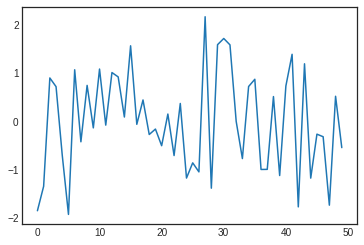

In [101]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

X = range(50)
Y = tf.random.normal([50],0,1)
plt.plot(X,Y)
plt.show()

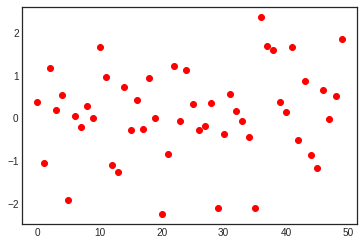

In [102]:
X = range(50)
Y = tf.random.normal([50],0,1)
plt.plot(X,Y,'ro')
plt.show()

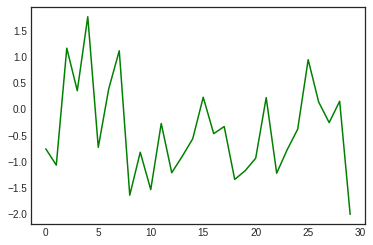

In [104]:
X = range(30)
Y = tf.random.normal([30],0,1)
plt.plot(X,Y,'g-')
plt.show()

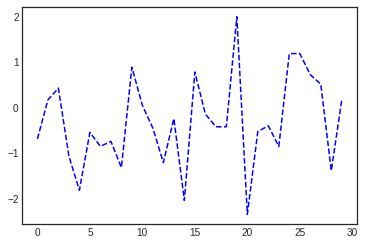

In [105]:
X = range(30)
Y = tf.random.normal([30],0,1)
plt.plot(X,Y,'b--')
plt.show()

(array([  2.,   0.,   1.,   3.,   0.,   3.,   3.,   4.,   3.,   8.,   5.,
          8.,  10.,  13.,  19.,  19.,  21.,  21.,  30.,  26.,  37.,  49.,
         50.,  58.,  71.,  78.,  83.,  89., 111., 122., 116., 119., 142.,
        153., 172., 198., 199., 190., 239., 237., 250., 259., 244., 270.,
        275., 303., 317., 305., 289., 267., 279., 277., 257., 262., 263.,
        241., 259., 240., 219., 172., 192., 200., 181., 146., 155., 107.,
        123., 128.,  98.,  88.,  94.,  67.,  53.,  64.,  43.,  37.,  43.,
         37.,  40.,  21.,  29.,  14.,  23.,  12.,   7.,   8.,   7.,   6.,
          4.,   2.,   2.,   2.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,
          1.]),
 array([-3.460891  , -3.389344  , -3.317797  , -3.2462497 , -3.1747026 ,
        -3.1031556 , -3.0316086 , -2.9600616 , -2.8885143 , -2.8169672 ,
        -2.7454202 , -2.6738732 , -2.602326  , -2.530779  , -2.4592319 ,
        -2.3876848 , -2.3161378 , -2.2445905 , -2.1730435 , -2.1014965 ,
        -2.0299494 , -1.95

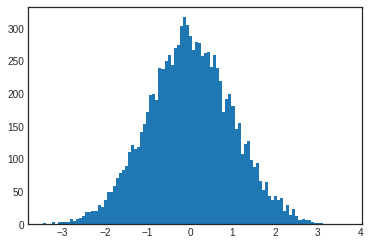

In [106]:
random_normal = tf.random.normal([10000],0,1)
plt.hist(random_normal, bins = 100)

# w정규 분포 형태로 표현되는구만


### XOR Gate의 'LOSS' 시각화


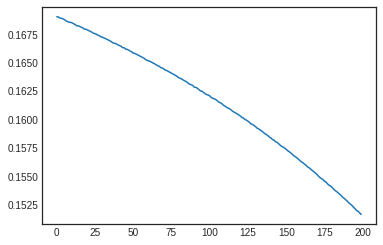

In [107]:
plt.plot(history.history['loss'])
# epoche를 200밖에 안해서 그런갑다